# Titanic : Exploratory Data Analysis


This notebook is created to perform an in-depth EDA on the Titanic dataset.

In [18]:
%pip install -r req.txt
%pip install missingno
%pip install mlxtend


import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt

df = pd.read_csv("Titanic.csv")
df.head()

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

df["Embarked"] =df["Embarked"].fillna(df["Embarked"].mode()[0])

df.drop(columns=['Cabin'], inplace=True)

In [22]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [23]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
### Split dataset for simple linear regression
X=df['Age'].values.reshape(-1,1)
y=df['Fare'].values

<Axes: >

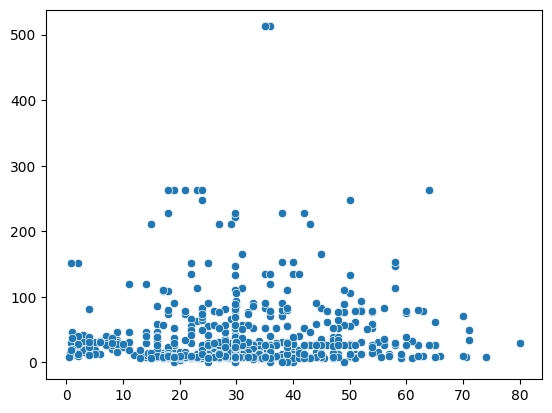

In [25]:
sns.scatterplot(x=X.flatten(),y=y)

### Linear Regression From Scratch

In [26]:
def fit_linear_regression(X,y):
    X_mean=np.mean(X)
    y_mean=np.mean(y)

    numerator=np.sum((X-X_mean)*(y-y_mean))
    denominator=np.sum((X-X_mean)**2)

    slope= numerator/denominator

    intercept=y_mean-slope*X_mean


    return slope, intercept


def predict_linear_regression(X, slope, intercept):
    return intercept + slope * X

In [27]:
scratch_slope, scratch_intercept = fit_linear_regression(X, y)

scratch_predictions = predict_linear_regression(X, scratch_slope, scratch_intercept)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

sklearn_model = LinearRegression()

sklearn_model.fit(X, y)

sklearn_predictions = sklearn_model.predict(X)

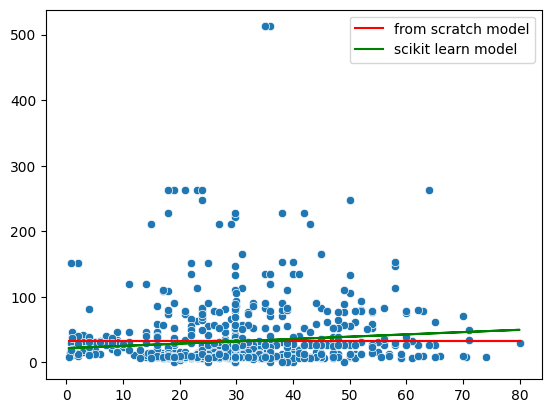

In [29]:
sns.scatterplot(x=X.flatten(), y=y)
plt.plot(X, scratch_predictions, color='red', label="from scratch model")
plt.plot(X, sklearn_predictions, color='green', label='scikit learn model')
plt.legend()

In [30]:
scratch_mse = mean_squared_error(y, scratch_predictions)
scratch_r2 = r2_score(y, scratch_predictions)

sklearn_mse = mean_squared_error(y, sklearn_predictions)
sklearn_r2 = r2_score(y, sklearn_predictions)

NameError: name 'mean_squared_error' is not defined